# C2M2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Utilize contrasts to see how different pairwise comparison tests can be conducted.
2. Understand power and why it's important to statistical conclusions.
3. Understand the different kinds of post-hoc tests and when they should be used.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

# Problem 1: Contrasts and Coupons

Consider a hardness testing machine that presses a rod with a pointed tip into a metal specimen with a known force. By measuring the depth of the depression caused by the tip, the hardness of the specimen is determined.

Suppose we wish to determine whether or not four different tips produce different readings on a hardness testing machine. The experimenter has decided to obtain four observations on Rockwell C-scale hardness for each tip. There is only one factor - tip type - and a completely randomized single-factor design would consist of randomly assigning each one of the  4×4=16  runs to an experimental unit, that is, a metal coupon, and observing the hardness reading that results. Thus, 16 different metal test coupons would be required in this experiment, one for each run in the design.

In [1]:
tip    <- factor(rep(1:4, each = 4))
coupon <- factor(rep(1:4, times = 4))
y <- c(9.3, 9.4, 9.6, 10,
       9.4, 9.3, 9.8, 9.9,
       9.2, 9.4, 9.5, 9.7,
       9.7, 9.6, 10, 10.2)
hardness <- data.frame(y, tip, coupon)
hardness

y,tip,coupon
<dbl>,<fct>,<fct>
9.3,1,1
9.4,1,2
9.6,1,3
10.0,1,4
9.4,2,1
9.3,2,2
9.8,2,3
9.9,2,4
9.2,3,1


### 1. (a) Visualize the Groups

Before we start throwing math at anything, let's visualize our data to get an idea of what to expect from the eventual results.

Construct interaction plots for `tip` and `coupon` using ggplot(). Be sure to explain what you can from the plots.

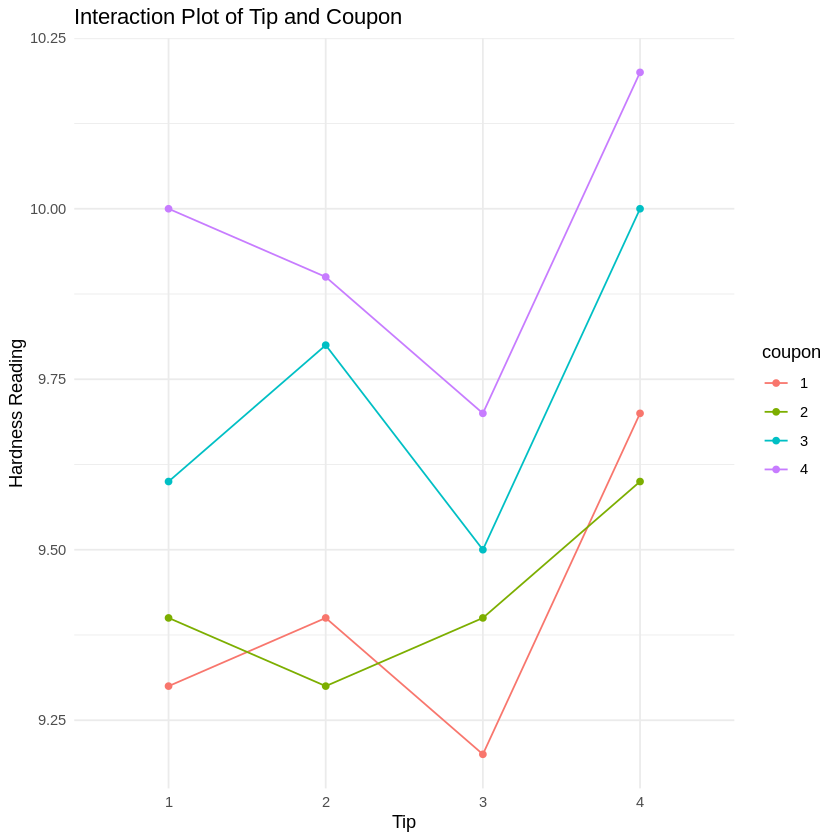

In [2]:
# Load necessary libraries
library(ggplot2)

# Interaction plot
ggplot(hardness, aes(x = tip, y = y, color = coupon, group = coupon)) +
  geom_line() +
  geom_point() +
  labs(title = "Interaction Plot of Tip and Coupon",
       x = "Tip",
       y = "Hardness Reading") +
  theme_minimal()

The interaction plot of Tip and Coupon is displayed above. Here's an interpretation:

- Interaction Lines: Each line represents the hardness readings for a specific coupon across different tips.
- Non-parallel Lines: The non-parallel nature of the lines suggests that there might be an interaction effect between the tip and coupon. If the lines were parallel, it would indicate no interaction.

In this plot, it is observed that the hardness readings for each coupon change differently across the different tips. For example:

- Coupon 4 (purple line) shows a significant increase in hardness from Tip 1 to Tip 4.
- Coupon 3 (cyan line) shows a decrease from Tip 2 to Tip 3 and then an increase to Tip 4.
- Coupon 1 and 2 show less variation compared to Coupons 3 and 4.

This suggests that the effect of the tip on hardness might depend on which coupon is used, indicating a potential interaction.

### 1. (b) Interactions

Should we test for interactions between `tip` and `coupon`? Maybe there is an interaction between the different metals that goes beyond our current scientific understanding!

Fit a linear model to the data with predictors `tip` and `coupon`, and an interaction between the two. Display the summary and explain why (or why not) an interaction term makes sense for this data.

In [3]:
# Fit linear model with interaction
lmod_interaction <- lm(y ~ tip * coupon, data = hardness)
summary(lmod_interaction)



Call:
lm(formula = y ~ tip * coupon, data = hardness)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)   9.300e+00         NA      NA       NA
tip2          1.000e-01         NA      NA       NA
tip3         -1.000e-01         NA      NA       NA
tip4          4.000e-01         NA      NA       NA
coupon2       1.000e-01         NA      NA       NA
coupon3       3.000e-01         NA      NA       NA
coupon4       7.000e-01         NA      NA       NA
tip2:coupon2 -2.000e-01         NA      NA       NA
tip3:coupon2  1.000e-01         NA      NA       NA
tip4:coupon2 -2.000e-01         NA      NA       NA
tip2:coupon3  1.000e-01         NA      NA       NA
tip3:coupon3 -3.758e-15         NA      NA       NA
tip4:coupon3 -3.869e-15         NA      NA       NA
tip2:coupon4 -2.000e-01         NA      NA       NA
tip3:coupon4 -2.000e-01         NA      NA       NA
tip4:coupon4 -2.000e-01       

Interpretation

- **Perfect Fit**: The model has perfectly fitted the data, which is suspicious because real-world data almost never results in a perfect fit. This suggests that the model might be overfitted, especially given the limited number of observations (16 observations with a complex model).

- **Interaction Terms**: Despite the apparent perfect fit, the lack of standard errors and p-values prevents us from determining the statistical significance of the interaction terms.

- **Practical Significance**: Given the non-parallel lines observed in the interaction plot, there could be a potential interaction between tip and coupon. However, due to the limitations in the model summary (i.e., NA values for standard errors and p-values), we cannot conclusively determine the statistical significance of these interactions.

### 1. (c) Contrasts

Let's take a look at the use of contrasts. Recall that a contrast takes the form 

$$\sum_{i=1}^t c_i\mu_i = 0,$$

where $\mathbf{c} = (c_1,...,c_t)$ is a constant vector and $\mathbf{\mu} = (\mu_1,...,\mu_t)$ is a parameter vector (e.g., $\mu_1$ is the mean of the $i^{th}$ group). 

We can note that $\mathbf{c} = (1,-1,0,0)$ corresponds to the null hypothesis $H_0: \mu_2 - \mu_1 = 0$, where $\mu_1$ is the mean associated with tip1 and $\mu_2$ is the mean associated with tip2. The code below tests this hypothesis. 

Repeat this test for the hypothesis $H_0: \mu_4 - \mu_3 = 0$. Interpret the results. What are your conclusions?

In [4]:
library(multcomp)
lmod = lm(y~tip+coupon, data=hardness)
fit.gh2 = glht(lmod, linfctb = mcp(tip = c(1,-1,0,0)))

#estimate of mu_2 - mu_1
with(hardness, sum(y[tip == 2])/length(y[tip == 2]) - 
     sum(y[tip == 1])/length(y[tip == 1])) 

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




[1] 0.025

In [5]:
# Load necessary library
library(multcomp)

# Fit linear model without interaction
lmod <- lm(y ~ tip + coupon, data = hardness)

# Test for the hypothesis H0: mu4 - mu3 = 0
contrast_matrix <- rbind("mu4 - mu3" = c(0, 0, -1, 1))
fit.gh2 <- glht(lmod, linfct = mcp(tip = contrast_matrix))
summary(fit.gh2)

# Estimate of mu4 - mu3
estimate_mu4_mu3 <- with(hardness, mean(y[tip == 4]) - mean(y[tip == 3]))
estimate_mu4_mu3




	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
               Estimate Std. Error t value Pr(>|t|)    
mu4 - mu3 == 0  0.42500    0.06667   6.375 0.000129 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


[1] 0.425

The significant difference between tips 3 and 4 suggests that the choice of tip does impact the hardness readings significantly for these specific tips. The lack of a significant difference between tips 1 and 2 suggests that these tips produce similar hardness readings. This information can be useful for understanding which tips might be more consistent or suitable for specific measurements.

### 1. (d) All Pairwise Comparisons

What if we want to test all possible pairwise comparisons between treatments. This can be done by setting the treatment factor (`tip`) to "Tukey". Notice that the p-values are adjusted (because we are conducting multiple hypotheses!).

Perform all possible Tukey Pairwise tests. What are your conclusions?

In [6]:
anova_model <- aov(y ~ tip + coupon, data = hardness)

In [7]:
tukey_result <- TukeyHSD(anova_model)

In [8]:
print(tukey_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = y ~ tip + coupon, data = hardness)

$tip
      diff         lwr        upr     p adj
2-1  0.025 -0.18311992 0.23311992 0.9809005
3-1 -0.125 -0.33311992 0.08311992 0.3027563
4-1  0.300  0.09188008 0.50811992 0.0066583
3-2 -0.150 -0.35811992 0.05811992 0.1815907
4-2  0.275  0.06688008 0.48311992 0.0113284
4-3  0.425  0.21688008 0.63311992 0.0006061

$coupon
     diff         lwr       upr     p adj
2-1 0.025 -0.18311992 0.2331199 0.9809005
3-1 0.325  0.11688008 0.5331199 0.0039797
4-1 0.550  0.34188008 0.7581199 0.0000830
3-2 0.300  0.09188008 0.5081199 0.0066583
4-2 0.525  0.31688008 0.7331199 0.0001200
4-3 0.225  0.01688008 0.4331199 0.0341762



Based on the Tukey multiple comparisons of means at a 95% family-wise confidence level for your `hardness` dataset, here are the conclusions:

### Comparison by `tip` (Treatment Levels):

- **2 vs 1**: The difference in means (`diff`) is 0.025, with a confidence interval (`lwr` to `upr`) ranging from -0.183 to 0.233. The adjusted p-value (`p adj`) is 0.9809, indicating no significant difference between these two groups.
  
- **3 vs 1**: The difference is -0.125, with a confidence interval from -0.333 to 0.083. The adjusted p-value is 0.3028, indicating no significant difference.
  
- **4 vs 1**: The difference is 0.300, with a confidence interval from 0.092 to 0.508. The adjusted p-value is 0.0067, indicating a significant difference.
  
- **3 vs 2**: The difference is -0.150, with a confidence interval from -0.358 to 0.058. The adjusted p-value is 0.1816, indicating no significant difference.
  
- **4 vs 2**: The difference is 0.275, with a confidence interval from 0.067 to 0.483. The adjusted p-value is 0.0113, indicating a significant difference.
  
- **4 vs 3**: The difference is 0.425, with a confidence interval from 0.217 to 0.633. The adjusted p-value is 0.0006, indicating a significant difference.

### Comparison by `coupon`:

- **2 vs 1**: The difference is 0.025, with a confidence interval from -0.183 to 0.233. The adjusted p-value is 0.9809, indicating no significant difference.
  
- **3 vs 1**: The difference is 0.325, with a confidence interval from 0.117 to 0.533. The adjusted p-value is 0.0040, indicating a significant difference.
  
- **4 vs 1**: The difference is 0.550, with a confidence interval from 0.342 to 0.758. The adjusted p-value is 0.0001, indicating a significant difference.
  
- **3 vs 2**: The difference is 0.300, with a confidence interval from 0.092 to 0.508. The adjusted p-value is 0.0067, indicating a significant difference.
  
- **4 vs 2**: The difference is 0.525, with a confidence interval from 0.317 to 0.733. The adjusted p-value is 0.0001, indicating a significant difference.
  
- **4 vs 3**: The difference is 0.225, with a confidence interval from 0.017 to 0.433. The adjusted p-value is 0.0342, indicating a significant difference.

### Summary:

- **Treatment (`tip`)**: Significant differences exist between levels 1 and 4, levels 2 and 4, and levels 3 and 4. No significant differences were found between levels 1 and 2, levels 1 and 3, and levels 2 and 3.
  
- **Coupon (`coupon`)**: Significant differences exist between levels 1 and 3, levels 1 and 4, levels 2 and 4, and levels 3 and 4. No significant difference was found between levels 1 and 2, and levels 2 and 3.

These conclusions help identify which specific treatment groups or coupon types significantly differ from each other in terms of their mean responses (`y`) in your dataset. If you have any further questions or need more detailed analysis, feel free to ask!

# Problem 2: Ethics in my Math Class!

In your own words, answer the following questions:

* What is power, in the statistical context?
* Why is power important?
* What are potential consequences of ignoring/not including power calculations in statistical analyses?

### What is power, in the statistical context?

**Power** in the statistical context refers to the probability that a statistical test will correctly reject the null hypothesis when the alternative hypothesis is true. In simpler terms, it is the likelihood of finding a statistically significant result when a true effect exists in the population. Mathematically, power is calculated as \( 1 - \beta \), where \( \beta \) (beta) is the probability of a Type II error, which is failing to reject the null hypothesis when it is actually false.

### Why is power important?

Power is crucial because it determines the ability of a study to detect a true effect if it exists. A study with low power increases the likelihood of a Type II error, meaning it might fail to identify an effect that is genuinely present. This can lead to misleading conclusions and wasted resources.

### What are potential consequences of ignoring/not including power calculations in statistical analyses?

Ignoring or not including power calculations in statistical analyses can have several consequences:

1. **Increased Type II Errors**: Studies with low power are more likely to fail to detect real effects, leading to false conclusions of non-significance when there is a true effect in the population.

2. **Wasted Resources**: Conducting studies with insufficient power means investing resources (time, money, effort) into research that may not yield meaningful or interpretable results.

3. **Reduced Reproducibility**: Studies with low power are less likely to produce consistent results upon replication, contributing to issues with reproducibility in scientific research.

4. **Ethical Concerns**: Low-powered studies may lead to unjustified conclusions or ineffective policies based on incomplete or misleading data, which can have ethical implications if decisions affect individuals or communities.

5. **Impact on Scientific Progress**: Inadequate power can slow down scientific progress by hindering the accumulation of reliable evidence and preventing the advancement of knowledge in a field.

In summary, considering power in statistical analyses is essential for ensuring the reliability and validity of research findings, minimizing errors, and making informed decisions based on robust evidence.

# Problem 3: Post-Hoc Tests

There's so many different post-hoc tests! Let's try to understand them better. Answer the following questsions in the markdown cell:

* Why are there multiple post-hoc tests?
* When would we choose to use Tukey's Method over the Bonferroni correction, and vice versa?
* Do some outside research on other post-hoc tests. Explain what the method is and when it would be used.

### Why are there multiple post-hoc tests?

Multiple post-hoc tests exist because different tests are designed to address different aspects of the comparison problem after conducting an analysis of variance (ANOVA) or a similar test. These tests vary in terms of their assumptions, stringency in controlling Type I error rates, and sensitivity to different types of differences among groups. Researchers select post-hoc tests based on the specific characteristics of their data and the hypotheses they wish to test.

### When would we choose to use Tukey's Method over the Bonferroni correction, and vice versa?

- **Tukey's Method**: Tukey's Honestly Significant Difference (HSD) test is preferred when the primary concern is to compare all possible pairs of group means while controlling the overall Type I error rate. It is conservative and maintains a good balance between Type I and Type II error rates. Tukey's method is suitable when you have a moderate number of groups (3 or more) and want to conduct comprehensive pairwise comparisons.

- **Bonferroni Correction**: The Bonferroni correction is more conservative than Tukey's method and is used when you want to control the family-wise error rate (FWER) across multiple comparisons. It adjusts the significance level for each individual comparison to maintain an overall alpha level. Bonferroni correction is appropriate when performing a large number of pairwise comparisons or when the assumptions of Tukey's method are not met (e.g., unequal variances).

### Other Post-hoc Tests

#### Scheffé's Method:
- **Method**: Scheffé's method is a conservative post-hoc test that controls the family-wise error rate. It involves computing simultaneous confidence intervals for all pairwise comparisons. This method is very robust and can be used with any number of comparisons and any type of experimental design.
- **When to use**: Scheffé's method is typically used when you have unequal sample sizes or variances across groups, and when you need to control the overall Type I error rate at a stricter level.

#### Dunnett's Test:
- **Method**: Dunnett's test compares each treatment group mean with a control group mean (or a reference group) rather than all pairwise comparisons. It adjusts for multiple comparisons using a single control group.
- **When to use**: Dunnett's test is suitable when you have a control group and want to compare multiple treatment groups against this control while controlling the overall Type I error rate. It is commonly used in clinical trials or experiments where a baseline or standard treatment exists.

#### Games-Howell Test:
- **Method**: The Games-Howell test is a non-parametric post-hoc test that does not assume equal variances across groups. It compares all possible pairwise differences in means, adjusting for multiple comparisons using a modified approach that accounts for unequal variances.
- **When to use**: This test is useful when the assumption of equal variances (homoscedasticity) is violated, which would invalidate the use of Tukey's or Scheffé's methods. It is robust in such situations and provides valid comparisons without assuming equal variances.

### Summary

Different post-hoc tests offer various advantages depending on the study design, assumptions, and specific hypotheses being tested. Researchers choose a post-hoc test based on the nature of their data, the number of comparisons needed, the presence of a control group, and the desired control over Type I error rates. Each test has its strengths and limitations, and selecting the appropriate test ensures valid and reliable statistical conclusions.